Text(0, 0.5, 'Spending score (feature 2)')

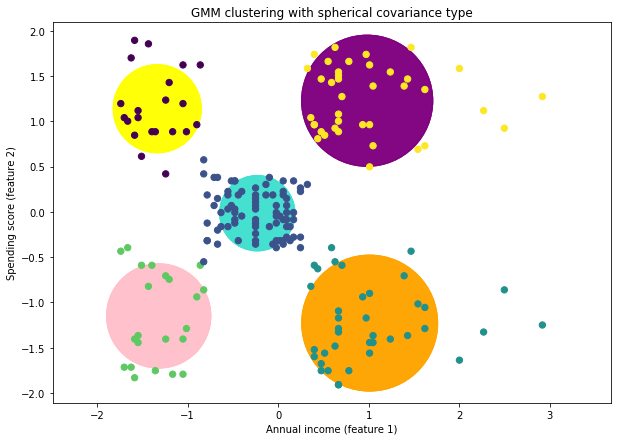

In [62]:
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline

customer_data = pd.read_csv('shopping-data.csv')
data = customer_data.iloc[:, 3:5].values

#standardize data into the same scale
customer_data.shape
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


colors = ['yellow', 'turquoise', 'orange','pink','purple']


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')
        
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        make_ellipses(gmm, ax)
        
gmm = GaussianMixture(n_components=5, random_state=42, covariance_type='spherical')

plt.figure(figsize=(10, 7)) 
plot_gmm(gmm, data_scaled)
plt.title('GMM clustering with spherical covariance type')
plt.xlabel('Annual income (feature 1)')
plt.ylabel('Spending score (feature 2)') 

For n_clusters = 2, silhouette score is 0.40267732960495795)
For n_clusters = 3, silhouette score is 0.43976779182142395)
For n_clusters = 4, silhouette score is 0.44835227011618684)
For n_clusters = 5, silhouette score is 0.5538037318866424)
For n_clusters = 6, silhouette score is 0.44143357094966773)
For n_clusters = 7, silhouette score is 0.4395469868524052)
For n_clusters = 8, silhouette score is 0.442796388471523)
For n_clusters = 9, silhouette score is 0.4247233803191658)


Text(0.5, 1.0, 'Plot of silhouette score')

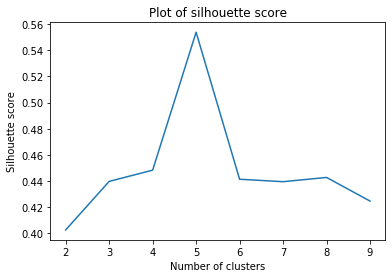

In [63]:
from sklearn.metrics import silhouette_score
 
range_n_clusters = list (range(2,10))
scores = []
for n in range_n_clusters:
    gmm = GaussianMixture(n_components=n, random_state=42, covariance_type='spherical')
    preds = gmm.fit_predict(data_scaled)

    score = silhouette_score(data_scaled, preds)
    scores.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n, score))
    
    
plt.plot(range_n_clusters, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Plot of silhouette score') 